In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype(float) / 255 #차원이 한개 더 필요하므로 마지막에 1추가
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype(float) / 255
Y_train = utils.to_categorical(Y_train)
Y_test = utils.to_categorical(Y_test)

In [3]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25)) # 25퍼센트를 임의로 끄겠다
model.add(Flatten()) #차원 줄이기-1차원으로
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

- (9*32) + 32 = 320
- (9*32)*64 + 64 = 18496
- (9 * 32 * 64)/2*128 + 128 = 1179776
- 128*10 + 10 = 1290

In [5]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [7]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping, checkpointer])


Epoch 00001: val_loss improved from inf to 0.05213, saving model to ./model\01-0.0521.hdf5

Epoch 00002: val_loss improved from 0.05213 to 0.04063, saving model to ./model\02-0.0406.hdf5

Epoch 00003: val_loss improved from 0.04063 to 0.03334, saving model to ./model\03-0.0333.hdf5

Epoch 00004: val_loss improved from 0.03334 to 0.03134, saving model to ./model\04-0.0313.hdf5

Epoch 00005: val_loss improved from 0.03134 to 0.02756, saving model to ./model\05-0.0276.hdf5

Epoch 00006: val_loss improved from 0.02756 to 0.02629, saving model to ./model\06-0.0263.hdf5

Epoch 00007: val_loss did not improve from 0.02629

Epoch 00008: val_loss did not improve from 0.02629

Epoch 00009: val_loss did not improve from 0.02629

Epoch 00010: val_loss did not improve from 0.02629

Epoch 00011: val_loss did not improve from 0.02629

Epoch 00012: val_loss did not improve from 0.02629

Epoch 00013: val_loss did not improve from 0.02629

Epoch 00014: val_loss did not improve from 0.02629

Epoch 00015

313/313 [==============================] - 2s 5ms/step - loss: 0.0270 - accuracy: 0.9930
Test Accuracy: 0.9930


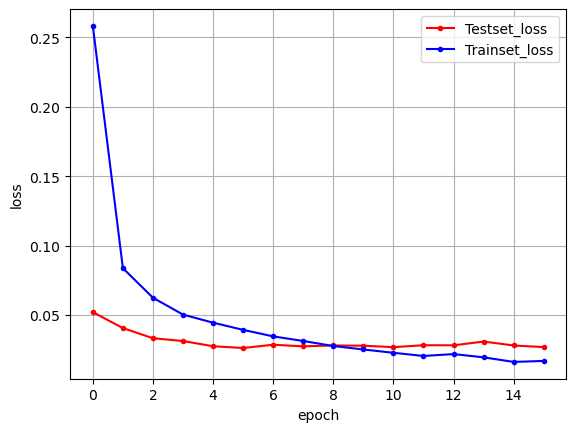

In [8]:
print("Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()